# BEE 4750 Homework 1: Introduction to Using Julia

**Name**: Bailey Belinger

**ID**: 5277347, bcb87

> **Due Date**
>
> Thursday, 9/5/24, 9:00pm

## Overview

### Instructions

-   Problem 1 consist of a series of code snippets for you to interpret
    and debug. You will be asked to identify relevant error(s) and fix
    the code.
-   Problem 2 gives you some code that works as intended; your goal is
    to identify the code’s purpose by following its logic.
-   Problem 3 asks you to write code to generate a random vector and
    subtract off its mean, using a Julia syntax called broadcasting.
-   Problem 4 asks you to convert a verbal description of a wastewater
    treatment system into a Julia function, and then to use that
    function to explore the impact of different wastewater allocation
    strategies.
-   Problem 5 (5750 only) asks you to use more advanced Julia
    techniques.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [1]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `~/bee4750/hw/hw1-bcb87`


Standard Julia practice is to load all needed packages at the top of a
file. If you need to load any additional packages in any assignments
beyond those which are loaded by default, feel free to add a `using`
statement, though [you may need to install the
package](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#package-management).

In [2]:
using Random
using Plots
using GraphRecipes
using LaTeXStrings

In [3]:
# this sets a random seed, which ensures reproducibility of random number generation. You should always set a seed when working with random numbers.
Random.seed!(1)

TaskLocalRNG()

## Problems (Total: 50/60 Points)

### Problem 1 (15 points)

The following subproblems all involve code snippets that require
debugging.

**For each of them**:

-   identify and describe the logic and/or syntax error;
-   write a fixed version of the function;
-   use your fixed function to solve the problem.

#### Problem 1.1

You’ve been tasked with writing code to identify the minimum value in an
array. You cannot use a predefined function. Your colleague suggested
the function below, but it does not return the minimum value.

In [1]:
function minimum(array)
    min_value = 0
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 0

Since the min_value is 0, the values in the array will be greater than min_value unless they are negative. Therefore, I changed the min_value to infinity which is shown in the code below.

In [4]:
function minimum(array)
    min_value = Inf #change min_value to infinity
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 78


#### Problem 1.2

Your team is trying to compute the average grade for your class, but the
following code produces an error.

In [5]:
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(grades)
  average_grade = mean(student_grades)
  return average_grade
end

@show average_grade;

UndefVarError: UndefVarError: `average_grade` not defined

Since we do not have the statistics model installed, the "mean" function will not work. It is also taking the mean of "student_grades" instead of "grades" within the function. Lastly, they are calling "average_grades" instead of "class_average". To fix these errors, I used the "sum" and "length" functions to calculate the mean and changed the calling of the incorrection function which is reflected in the code below.

In [6]:
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(student_grades)
  #average_grade = mean(student_grades, dims=1)
  #mean is not a function
  tot = sum(student_grades)
  num = length(student_grades)
  average_grade = tot/num;
  return average_grade
end

@show class_average(student_grades); #calling the wrong function name

class_average(student_grades) = 94.4


#### Problem 1.3

Your team wants to know the expected payout of an old Italian dice game
called *passadieci* (which was analyzed by Galileo as one of the first
examples of a rigorous study of probability). The goal of passadieci is
to get at least an 11 from rolling three fair, six-sided dice. Your
strategy is to compute the average wins from 1,000 trials, but the code
you’ve written below produces an error.

In [7]:
function passadieci()
    # this rand() call samples 3 values from the vector [1, 6]
    roll = rand(1:6, 3) 
    return roll
end
n_trials = 1_000
outcomes = zero(n_trials)
for i = 1:n_trials
    outcomes[i] = (sum(passadieci()) > 11)
end
win_prob = sum(outcomes) / n_trials # compute average number of wins
@show win_prob;

MethodError: MethodError: no method matching setindex!(::Int64, ::Bool, ::Int64)

The error within this code is caused by only using "zero" instead of "zeros" when creating the outcomes vector. An if statement is also needed to add a zero or one to "outcomes", instead of the score of the die. I fixed this in the code below:

In [8]:
function passadieci()
    # this rand() call samples 3 values from the vector [1, 6]
    roll = rand(1:6, 3) 
    return roll
end
n_trials = 1_000
outcomes = zeros(n_trials) #made "zeros"
for i = 1:n_trials
    if sum(passadieci()) >= 11 #added if statement
        outcomes[i] = 1
    else 
        outcomes[i] = 0
    end
end
win_prob = sum(outcomes) / n_trials # compute average number of wins
@show win_prob;

win_prob = 0.502


### Problem 2 (5 points)

You’ve been handed some code to analyze. The original coder was not very
considerate of other potential users: the function is called
`mystery_function` and there are no comments explaining the purpose of
the code. It appears to take in an array and return some numbers, and
you’ve been assured that the code works as intended.

**In this problem**:

-   Explain the purpose of `mystery_function`.
-   Add comments to the code, explaining why and how it works. Refer to
    [“Best Practices for Writing Code
    Comments”](https://stackoverflow.blog/2021/12/23/best-practices-for-writing-code-comments/),
    and remember that bad comments can be just as bad as no comments at
    all. You do not need to add comments to every line (in fact, this is
    very bad practice), but you should note the *purpose* of every
    “section” of code, and add comments explaining any code sequences
    that you don’t immediately understand.
-   Is there a built-in Julia function that does the same thing as
    `mystery_function`? If so, what is it? Use it to do the same thing
    as the code above.


In [10]:
# The purpose of `mystery_function` is to remove duplicates from an array 
# and return an arrary with the numbers only appearing once, while 
# preserving the order.
function mystery_function(values)
    #creates an empty array
    y = []
    for v in values
        if !(v in y) #checking to see if the number in values has been 
                        # added to array y
            append!(y, v) #if not, add it to y
        end
    end
    return y
end

list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
@show mystery_function(list_of_values);

# The function in Julia that does this is called 'unique' and can 
# be seen in the code below.
# To find this function I used Google, here is the link:
# https://docs.julialang.org/en/v1/base/collections/
list_of_values = [1, 2, 3, 4, 3, 4, 2, 1];
y = unique(list_of_values)

mystery_function(list_of_values) = Any[1, 2, 3, 4]


4-element Vector{Int64}:
 1
 2
 3
 4

### Problem 3 (10 points)

You’re interested in writing some code to remove the mean of a vector.

**In this problem**:

-   Write a function `compute_mean(v)` which sums all of the elements of
    a vector `v` using a `for` loop and computes the mean.
-   Make a random vector `random_vect` of length 10 using Julia’s
    `rand()` function. Use your `compute_mean()` function to calculate
    its mean and subtract it from `random_vect` **without a loop**
    (using a Julia technique called *broadcasting*; feel free to consult
    the Julia documentation and search as necessary). Check that the new
    vector has mean zero.

The function "compute_mean" uses a for loop to calculate the sum off all of the vector elements. Next, it calculates the mean by dividing the sum of the elements by the length of the vector.

In [11]:
function compute_mean(v)
    tot = 0.0;
    for i =1:length(v) #find the sum of all vector elements
       tot = tot + v[i]         
    end
    mean_val = tot/length(v); #calculate mean
    return mean_val
end

random_vect = rand(10);
x = compute_mean(random_vect);
random_vect = random_vect .- x #using broadcasting to work elementwise
y = compute_mean(random_vect)
display(y) #Checking that the new mean is zero

8.881784197001253e-17



### Problem 4 (20 points)

Cheap Plastic Products, Inc. is operating a plant that produces
$100 \text{m}^3\text{/day}$ of wastewater that is discharged into
Pristine Brook. The wastewater contains $1 \text{kg/m}^3$ of YUK, a
toxic substance. The US Environmental Protection Agency has imposed an
effluent standard on the plant prohibiting discharge of more than
$20 \text{kg/day}$ of YUK into Pristine Brook.

Cheap Plastic Products has analyzed two methods for reducing its
discharges of YUK. Method 1 is land disposal, which costs $X_1^2/20$
dollars per day, where $X_1$ is the amount of wastewater disposed of on
the land ($\text{m}^3\text{/day}$). With this method, 20% of the YUK
applied to the land will eventually drain into the stream (*i.e.*, 80%
of the YUK is removed by the soil).

Method 2 is a chemical treatment procedure which costs \$1.50 per
$\text{m}^3$ of wastewater treated. The chemical treatment has an
efficiency of $e= 1 - 0.005X_2$, where $X_2$ is the quantity of
wastewater ($\text{m}^3\text{/day}$) treated. For example, if
$X_2 = 50 \text{m}^3\text{/day}$, then $e = 1 - 0.005(50) = 0.75$, so
that 75% of the YUK is removed.

Cheap Plastic Products is wondering how to allocate their wastewater
between these three disposal and treatment methods (land disposal, and
chemical treatment, and land disposal) to meet the effluent standard
while keeping costs manageable.

The flow of wastewater through this treatment system is shown in
<a href="#fig-wastewater" class="quarto-xref">Figure 1</a>. Modify the
edge labels (by editing the `edge_labels` dictionary in the code
producing <a href="#fig-wastewater" class="quarto-xref">Figure 1</a>) to
show how the wastewater allocations result in the final YUK discharge
into Pristine Brook. For the `edge_label` dictionary, the tuple $(i, j)$
corresponds to the arrow going from node $i$ to node $j$. The syntax for
any entry is `(i, j) => "label text"`, and the label text can include
mathematical notation if the string is prefaced with an `L`, as in
`L"x_1"` will produce $x_1$.

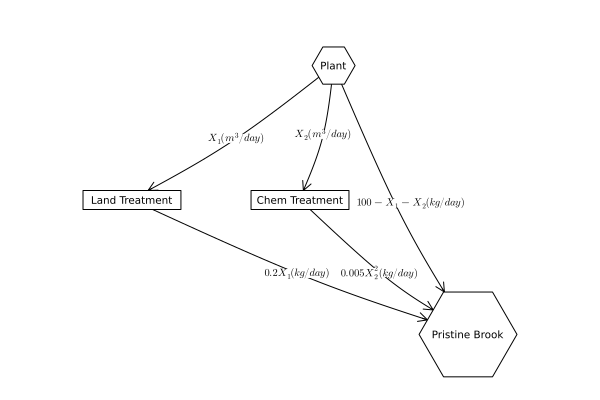

In [17]:
A = [0 1 1 1;
    0 0 0 1;
    0 0 0 1;
    0 0 0 0]

names = ["Plant", "Land Treatment", "Chem Treatment", "Pristine Brook"]
# modify this dictionary to add labels
# For everything to fit, Latex syntax was used to add extra 
# spaces: https://www.overleaf.com/learn/latex/Line_breaks_and_blank_spaces
edge_labels = Dict((1, 2) => L"X_1 (m^3/day)", (1,3) => L"X_2(m^3/day)", 
    (1,4) => L"\qquad\qquad100-X_1-X_2 (kg/day)",(2,4) => L"0.2X_1 (kg/day)",
    (3,4) => L"0.005X_2^2 (kg/day)")
shapes=[:hexagon, :rect, :rect, :hexagon]
xpos = [0, -1.5, -0.25, 1]
ypos = [1, 0, 0, -1]

p = graphplot(A, names=names,edgelabel=edge_labels, markersize=0.15, 
    markershapes=shapes, markercolor=:white, x=xpos, y=ypos)
display(p)

**In this problem**:

-   Formulate a mathematical model for the treatment cost and the amount
    of YUK that will be discharged into Pristine Brook based on the
    wastewater allocations. This is best done with some equations and
    supporting text explaining the derivation. Make sure you include, as
    additional equations in the model, any needed constraints on
    relevant values. You can find some basics on writing mathematical
    equations using the LaTeX typesetting syntax
    [here](https://viveks.me/environmental-systems-analysis/tutorials/latex-notebook.qmd),
    and a cheatsheet with LaTeX commands can be found on the course
    website’s [Resources
    page](https://viveks.me/environmental-systems-analysis/resources/markdown.qmd).

-   Implement your systems model as a Julia function which computes the
    resulting YUK concentration and cost for a particular treatment
    plan. You can return multiple values from a function with a
    [tuple](https://docs.julialang.org/en/v1/manual/functions/#Tuples-1),
    as in:

    ``` {julia}
    function multiple_return_values(x, y)
        return (x+y, x*y)
    end

    a, b = multiple_return_values(2, 5)
    @show a;
    @show b;
    ```

    To evalute the function over vectors of inputs, you can *broadcast*
    the function by adding a decimal `.` before the function arguments
    and accessing the resulting values by writing a *comprehension* to
    loop over the individual outputs in the vector:

    ``` {julia}
    x = [1, 2, 3, 4, 5]
    y = [6, 7, 8, 9, 10]

    output = multiple_return_values.(x, y)
    a = [out[1] for out in output]
    b = [out[2] for out in output]
    @show a;
    @show b;
    ```

    Make sure you comment your code appropriately to make it clear what
    is going on and why.

-   Use your function to experiment with some different combinations of
    wastewater discharge and treatment and plot the results of these
    experiments. Can you find one that satisfies the YUK effluent
    standard (plot this as well as a dashed red line)? What was the
    cost? What can you say about the tradeoff between treatment cost and
    YUK concentration? You don’t have to find an “optimal” solution to
    this problem, but what do you think would be needed to find a better
    solution?

### Code Explanation

The function 'YUK_discharge' with inputs of $X_1$ and $X_2$ can be used to find the total cost and total YUK discharge from the Cheap Plastics Products plant. $X_1$ is the wastewater discharge from the plant to the land treatment and $X_2$ is the wastewater discharge from the plant to the chemical treatment. This function checks that the amount of wastewater produced a day is less than or equal to 100m^3/day. It also prints a message if the YUK discharge is greater than 20kg/day based on the calculations done within the function. Lastly, the function creates a scatter plot of the cost and YUK discharge for different combinations of $X_1$ and $X_2$ values. 

To determine the total cost and YUK discharge, the following logic/equations were used:

- The total wastewater discharge must be 100m^3/day. Therefore, if the $X_1$ (land) and $X_2$ (chemical) discharges sum to over 100 m^3/day, the data will not be correct. To account for this, I added an if statement. 

- Next, to determine the wastewater that is sent directly to Pristine Brook, I subtracted $X_1$ and $X_2$ from a total of 100m^3/day. This is represented as $YUK0 = 100 - X_1 -X_2$ in the code below.

- To determine the YUK discharge and cost from the land treatment, I used that 20% of the YUK applied to the land will eventually reach Pristine Brook and the given cost formula. This is reflected in the equations below:
        
    $YUK_1 = 0.2 * X_1$
    
    $cost_1 = X_1^2/20$

- Now, to find the discharge from the chemical treatment, I used the given efficiency of $e= 1 - 0.005X_2$. This is the percentage of the YUK that is removed from the wastewater, thus the amount that will reach Pristine Brooke is $1-e$. The cost for chemical treatment is $1.50 per m^3 of wastewater. Both of these are implemented using these equations:

    $e= 1 - 0.005X_2$

    $YUK_2 = X_2*(1-e)$

    $cost_2 = 1.5*X_2$

- Finally, to determine the total cost of the treatmeans and the total YUK discharge I used the following equations:

    $totcost = cost_1 + cost_2$

    $totYUK = YUK_0 + YUK_1 + YUK_2$

After the function is ran, comprehension is used to store the cost and YUK discharge in vectors so that a scatter plot can be created.

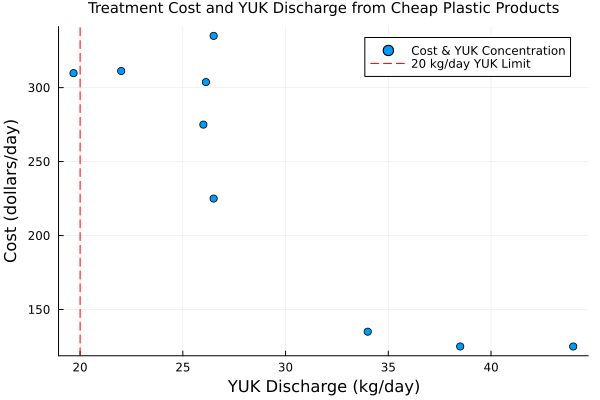

In [16]:
function YUK_discharge(X1, X2)
    if X1 + X2 <= 100
        YUK0 = 100 - X1 - X2; # Calculate discharge directly into 
        # Pristine Brook
        # Discharge and cost from waste X1 (Land), converted to 
        # kg/day by multiplying by 1kg/m^3
        YUK1 = 0.2*X1;
        cost1 = (X1^2)/20;
        #Discharge and cost from waste X2 (Chemical), converted 
        # to kg/day by multiplying by 1kg/m^3
        e = 1-0.005*X2;
        YUK2 = X2*(1-e)
        cost2 = 1.5*X2;
        #Total cost from both Land and Chemical discharge
        totcost = cost1 + cost2;
        totYUK = YUK0 + YUK1 + YUK2;
        return (totcost, totYUK)
        if YUK0 + YUK1 + YUK2 >= 20
            print("YUK dischange greater than 20kg/day")
        end
    else print("Wastewater discharge greater than 100m^3/day")
    end
end
#Create vectors with potential X1 and X2 values
X1 = [80, 20, 75, 75, 74, 70, 60, 30, 10]
X2 = [10, 70, 15, 20, 24, 20, 30, 60, 80]
#Use a comprehension loop to get results from values above
output = YUK_discharge.(X1, X2)
cost = [out[1] for out in output]
YUK =  [out[2] for out in output]
#Plot the results of the cost vs. the YUK discharge
# For plotting assistance, I used this link: 
# https://docs.juliaplots.org/latest/tutorial/
scatter((YUK, cost), label = "Cost & YUK Concentration", 
    title = "Treatment Cost and YUK Discharge from Cheap Plastic Products", 
    titlefont = font(10))
vline!([20], color=:red, linestyle=:dash, label = "20 kg/day YUK Limit")
ylabel!("Cost (dollars/day)")
xlabel!("YUK Discharge (kg/day)")


### Discussion

The solution I found is X1=72 and X2=24. This gives a total cost of $309.80/day and a total YUK discharge of 19.68 kg/day. The more discharge that you send for land and chemical treatment , the more expensive it is going to be but this must be done in order to meet the EPA standards. The more YUK you remove, the more it is going to cost. To find a better solution you would need to iterate through all of the possible combinations of X1 and X2 in order to find one where the cost is minimized, YUK discharge is under 20 kg/day, and the total wastewater discharge is less than or equal to 100 m^3/day.

### Problem 5 (10 points)

**This problem is only required for students in BEE 5750**.

#### Problem 5.1

Using a
[comprehension](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#comprehensions),
count the number of odd numbers between 0 and 149.

> **Hint**
>
> `iseven()` returns `true` for even numbers and `false` for odd
> numbers.

#### Problem 5.2

Write a function `polynomial(x, a)` which calculates the polynomial
$$p(x) = \sum_{i=1}^n a_i x^i$$

based on a point `x` and a coefficient vector `a` of length `n` using a
loop. Test your function by computing $$p(x) = 2x^3 - x^2 + 1$$ at
$x=2$.

## References

List any external references consulted, including classmates.

Classmates: Priya Shah, Camila Monter

unique function: https://docs.julialang.org/en/v1/base/collections/

Line spaceing: https://www.overleaf.com/learn/latex/Line_breaks_and_blank_spaces

Plotting assistance: https://docs.juliaplots.org/latest/tutorial/